In [1]:
import numpy as np
import matplotlib.pyplot as plt


def runge_kutta(time_steps, y0, system, params):
    ys = [y0]
    for t in range(len(time_steps)-1):
        dt = time_steps[t+1]-time_steps[t]
        t0 = time_steps[t]
        t1 = time_steps[t+1]
        k1 = system(t0, y0, params)
        k2 = system(t0 + dt/2, y0 + dt / 2 * k1, params)
        k3 = system(t0 + dt/2, y0 + dt / 2 * k2, params)
        k4 = system(t1, y0 + dt * k3, params)
        y0  = y0 + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        ys.append(y0)
    return np.array(ys)

def lorentz_ode(t, xyz, params):
    x, y, z = xyz
    σ = params['σ']
    ρ = params['ρ']
    β = params['β']
    
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    
    return np.array([dx, dy, dz])

time_steps = np.arange(0, 1500, 0.1)
params = {'σ' : 10., 'ρ' : 28., 'β' : 8/3}
xyz0 = np.array([1., 1., 1.])
lorenz_solution = runge_kutta(time_steps, xyz0, lorentz_ode, params)
x, y, z = lorenz_solution[2000:].T

In [2]:
x = (x - min(x)) / (max(x) - min(x))

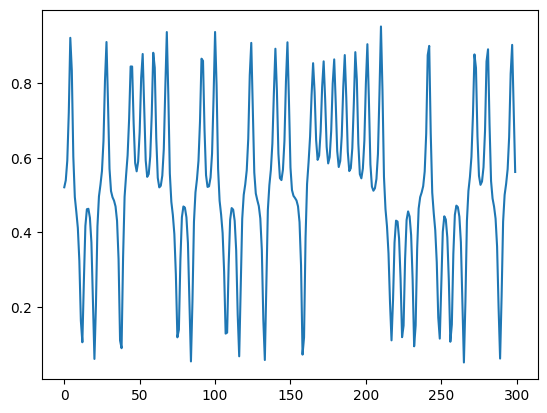

In [3]:
plt.plot(x[:300])

In [ ]:
import itertools
import tqdm

In [8]:
def generate_patterns(K, L):
    patterns = np.array(list(itertools.product(np.arange(1, K+1), repeat=L)))
    return patterns

def sample_z_vectors(x, pattern):
    T = len(x)
    ind = np.array([0, *np.cumsum(pattern)])

    samples = []
    for i in range(T-ind[-1]):
        samples.append(x[ind+i][:])
    return np.array(samples)

def sample_z_new(x, pattern):
    ind = np.array([0, *np.cumsum(pattern)])
    T = len(x) - ind[-1]
    return x[ind[:-1] + T]

In [9]:
patterns = generate_patterns(K=10, L=4)
patterns

array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  2],
       [ 1,  1,  1,  3],
       ...,
       [10, 10, 10,  8],
       [10, 10, 10,  9],
       [10, 10, 10, 10]])

In [13]:
x_train = x[:10000]
x_test = x[10000:]
Zs = []
for pattern in tqdm.tqdm(patterns):
    Zs.append(sample_z_vectors(x_train, pattern))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [03:11<00:00, 52.33it/s]


In [14]:
patterns[13], Zs[13]

(array([1, 1, 2, 4]),
 array([[0.52126788, 0.53986791, 0.59267744, 0.92249179, 0.45510371],
        [0.53986791, 0.59267744, 0.72221493, 0.83491468, 0.41192669],
        [0.59267744, 0.72221493, 0.92249179, 0.60333675, 0.32351637],
        ...,
        [0.60458413, 0.73484107, 0.91365351, 0.61135596, 0.4209721 ],
        [0.73484107, 0.91365351, 0.82359131, 0.51377129, 0.32269588],
        [0.91365351, 0.82359131, 0.61135596, 0.48368393, 0.13058004]]))

In [15]:
predictions = []
for h in range(20):
    S = []
    for i, pattern in tqdm.tqdm(enumerate(patterns)):
        z_new = sample_z_new(x_train, pattern)
        S.extend(Zs[i][np.linalg.norm(Zs[i][:, :-1] - z_new, axis=1) < 0.005][:, -1])
    y_hat = np.mean(S)
    x_train = np.append(x_train, y_hat)
    predictions.append(y_hat)

10000it [00:03, 2893.64it/s]
10000it [00:03, 3018.58it/s]
10000it [00:03, 3027.51it/s]
10000it [00:03, 3007.39it/s]
10000it [00:03, 3003.07it/s]
10000it [00:03, 3017.03it/s]
10000it [00:03, 3035.33it/s]
10000it [00:03, 3036.96it/s]
10000it [00:03, 3016.68it/s]
10000it [00:03, 3003.45it/s]
10000it [00:03, 3009.33it/s]
10000it [00:03, 3016.92it/s]
10000it [00:03, 3003.17it/s]
10000it [00:03, 3015.98it/s]
10000it [00:03, 3021.99it/s]
10000it [00:03, 3033.00it/s]
10000it [00:03, 3031.80it/s]
10000it [00:03, 3036.11it/s]
10000it [00:03, 3012.02it/s]
10000it [00:03, 3013.10it/s]


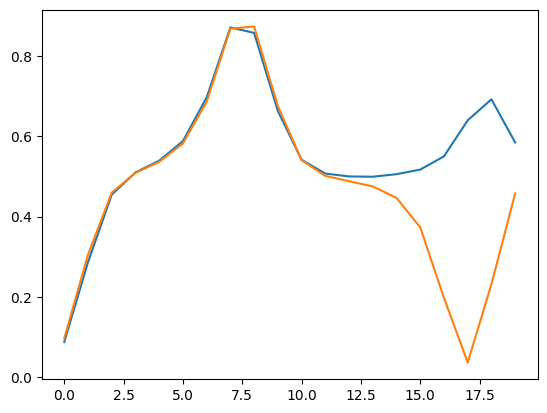

In [16]:
plt.plot(predictions)
plt.plot(x_test[:20])